## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis



In [280]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `scikit-learn` is a library that is used for machine learning and statistical modeling
* `string` contains functions for string operations

In [282]:
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import string


**Google Drive**
* `google.colab` a library that allows the colab notebook to mount the google drive

In [283]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Data Collection**

**Datasets and Files**
The following `csv` files were imported:

* `main.csv` contains the cleaned and dataframe. Contains both winners and finalists.
* `ohe.csv` contains the Placement, code, and the one-hot encoded challenge columns with placements.
* `score.csv` containts the `main.csv` content but instead of string placements, the placements were assigned to a value.

In [284]:
maindf = pd.read_csv('data\main.csv')
ohedf = pd.read_csv('data\ohe.csv')
scoredf = pd.read_csv('data\score.csv')

## **Modeling and Evaluation**

### **Feature Selection**

We get and make a list of the challenge columns.

In [285]:
col_list = maindf[['Design', 'Snatch Game', 'Ball', 'Makeover','Acting', 'Girl Groups', 'Rusical','count']].columns.tolist()

#### **Correlation Heatmap**

To see and check for any correlated values, we make and check the heatmap to see which of the challenges have the highest correlation.

In [286]:
score_challenges = scoredf[col_list].copy(deep = True)

Here we see the correlation table.

In [287]:
score_challenges.corr()

,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
Design,1.000000,-0.033087,-0.101747,0.099143,0.028909,0.160868,0.100912,0.554565
Snatch Game,-0.033087,1.000000,-0.217210,0.000897,-0.143795,-0.191004,-0.097189,-0.177061
Ball,-0.101747,-0.217210,1.000000,-0.363606,-0.046631,-0.167074,0.067856,0.153857
Makeover,0.099143,0.000897,-0.363606,1.000000,-0.012215,-0.062110,0.039559,0.120938
Acting,0.028909,-0.143795,-0.046631,-0.012215,1.000000,0.133076,0.020799,0.486580
Girl Groups,0.160868,-0.191004,-0.167074,-0.062110,0.133076,1.000000,-0.061520,0.392663
Rusical,0.100912,-0.097189,0.067856,0.039559,0.020799,-0.061520,1.000000,0.469559
count,0.554565,-0.177061,0.153857,0.120938,0.486580,0.392663,0.469559,1.000000


Presented here is the heatmap to better see the values

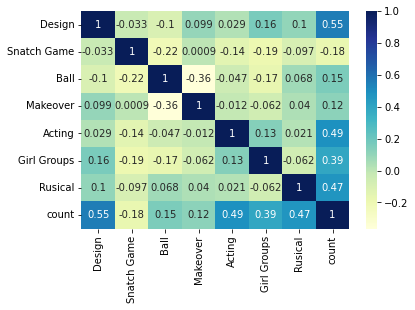

In [288]:
dataplot = sns.heatmap(score_challenges.corr(), cmap="YlGnBu", annot = True)

plt.show()

### **Modeling**

#### **Logistic Regression**

##### **Preparing the data**

Here we separate the winners in the `scoredf` dataframe as the dataset to train the model. We drop the `Queen`, `code`, and `count` columns as it won't be needed in training. 

In [289]:
winners = scoredf.loc[scoredf['Placement'] == 1].drop(['Queen', 'code','count'], axis = 1)

winners.head()

,Unnamed: 0,Placement,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
0,0,1,3.0,4.0,0.0,5.0,0.0,4.0,0.0
1,1,1,1.0,4.0,0.0,4.0,5.0,5.0,0.0
2,2,1,3.0,1.0,3.0,5.0,4.0,5.0,0.0
3,3,1,5.0,3.0,5.0,1.0,3.0,4.0,1.0
4,4,1,5.0,5.0,4.0,0.0,0.0,0.0,1.0


We also do the same for the finalists, but this time, we don't drop the `code` column so we can better call the finalists in this dataset.

To be more specific, we'll be getting only the top 4 or the finalists of the 15th Season of RuPaul's Drag Race.

In [290]:
finalists = scoredf.loc[scoredf['code'] == 'US15'].drop(['Queen','count'], axis = 1)

finalists.head()

,Unnamed: 0,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
43,43,0,US15,3.0,3.0,4.0,5.0,4.0,2.0,5.0
44,44,0,US15,3.0,4.0,4.0,4.0,5.0,4.0,4.0
45,45,0,US15,4.0,3.0,5.0,4.0,3.0,4.0,4.0
46,46,0,US15,5.0,3.0,3.0,1.0,3.0,3.0,4.0


Looking at the correlation heatmap once again, we look for the challenges that have a positive correlation.

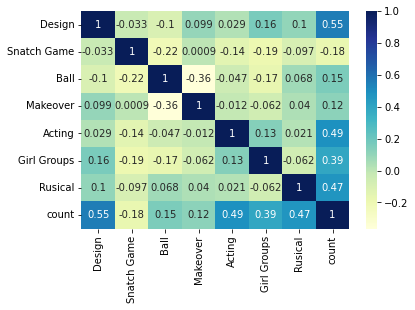

In [291]:
dataplot = sns.heatmap(score_challenges.corr(), cmap="YlGnBu", annot = True)

plt.show()

##### **Model Training**

Based on the correlation heat map, we get the input features based on the challenges with a positive correlation to the `count`.

In [292]:
X_lr = scoredf[['Design', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']]
y_lr = scoredf['Placement']

After inputting the features (`X`) and the target variable (`y'), we splite the data in to their respective training and testing sets.

In [293]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

Now, it's time to creade a linear regression model as well as fit the model to the training data.

In [294]:
model_lr = LinearRegression()

model_lr.fit(X_train_lr, y_train_lr)

LinearRegression()

After that, we now make predictions with the testing data and evaluate the model's performance using the MSE or Mean Squared Error

In [295]:
y_pred_lr = model_lr.predict(X_test_lr)

mse = mean_squared_error(y_test_lr, y_pred_lr)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17899297974011974


##### **Predicting the Outcome**

Now that we have a logistic regression prediction model, we now create a dataframe of the finalists (with the assigned value of `0`) and the same columns that were used to train the model.

In [296]:
pred_final = finalists[['Design', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']]

After that, it's time to make the prediction with the `pred_final` dataframe and print the values.

In [297]:
y_pred_lr = model.predict(pred_final)

print(y_pred_lr)

[0.70940744 0.7343343  0.74109283 1.07069248]


After seeing the `y_pred`, we now add it to a new dataframe to better identify which contestant their respective `Predicted_Outcome` score.

In [298]:
#Making a new dataframe with only the US15 contestants.
finalpred_lr = scoredf.loc[scoredf['code'] == 'US15']

#We create a new column and add in the y_pred values.
finalpred_lr['Predicted_Outcome'] = y_pred_lr

finalpred_lr[['Queen','code','Predicted_Outcome']]

C:\Users\Mos\AppData\Local\Temp\ipykernel_15652\2453030753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalpred_lr['Predicted_Outcome'] = y_pred_lr


,Queen,code,Predicted_Outcome
43,Anetra,US15,0.709407
44,Mistress Isabelle Brooks,US15,0.734334
45,Sasha Colby,US15,0.741093
46,Luxx Noir London,US15,1.070692


#### **Decision Tree**

##### **Preparing the Data**

Similar to Logistic Regression, we prepare the values by splitting the `scoredf` into features and target variables.

In [299]:
X_dt = scoredf[['Design', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']]
y_dt = scoredf['Placement'] # Target variable

# Split data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

##### **Model Training**

We then create the decision tree model with the `DecisionTreeClassifier` from the scikit-learn library.

In [300]:
clf = DecisionTreeClassifier()

clf.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier()

Then we used the trained model to predict with the test data. After that, we evaluate the model's performance based on the actual target values from the test data.

In [301]:
# Make predictions on the testing data
y_pred_dt = clf.predict(X_test_dt)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


##### **Predicting the Outcome**

We now get the predicted values by getting a copy of the predcted dataframe and running the `.predict()` function

In [302]:
finalpred_dt = pred_final.copy(deep = True)

new_pred_dt = clf.predict(finalpred_dt)

new_pred_dt

array([0, 0, 0, 1], dtype=int64)

After seeing the prediceted values, we now added it to a new column of the `finalpred_df`

In [303]:
finalpred_dt['prediction'] = new_pred_dt

finalpred_dt

,Design,Ball,Makeover,Acting,Girl Groups,Rusical,prediction
43,3.0,4.0,5.0,4.0,2.0,5.0,0
44,3.0,4.0,4.0,5.0,4.0,4.0,0
45,4.0,5.0,4.0,3.0,4.0,4.0,0
46,5.0,3.0,1.0,3.0,3.0,4.0,1


#### **Logistic Regression One-Hot Encoded**

##### **Preparing the Data**

We now do the same process as the Logistic Regression model, but for the One-Hot-Encoded dataset.

In [304]:
X_ohe = ohedf.drop("Unnamed: 0", axis = 1)
X_ohe = X_ohe.drop(['Queen', 'code', 'count'], axis = 1)
y_ohe = ohedf['Placement']

In order to use the dataset, we drop the non-one-hot encoded columns (Except for the `Placement` column)

We assign the features and variables and split the dataset.

In [305]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

##### **Model Training**

After preparing the data, we prepare the trained logistic regression model. 

After that, we fit the one-hot encoded data into the model.

In [306]:
logreg = LogisticRegression()

logreg.fit(X_train_ohe, y_train_ohe)

LogisticRegression()

Now we make the predictions from the test data and evaluate the model's accuracy.

In [307]:
y_pred_ohe = logreg.predict(X_test_ohe)

accuracy_ohe = logreg.score(X_test_ohe, y_test_ohe)
print("Accuracy:", accuracy_ohe)

Accuracy: 0.9090909090909091


##### **Predicting the Outcome**

Before predicting the outcome, we get the dataframe with only the `US15` finalists.

In [308]:
new_data = ohedf[ohedf['code'] == 'US15']

Now we extract the features to a new dataframe and adjusting accordingly to fit the prediction.

In [309]:
X_new_ohe = ohedf[ohedf['code'] == "US15"]
X_new_ohe = X_new_ohe.drop("Unnamed: 0", axis = 1)
X_new_ohe = X_new_ohe.drop(['Queen', 'code', 'count'], axis = 1)

We then make predictions with the new data and add the new predictions as a column.

In [311]:
predictions = logreg.predict(X_new_ohe)

# Add the predictions as a new column to the new data DataFrame
new_data['predicted_outcome'] = predictions

# You can now access the predicted outcome for each row in the new data using the 'predicted_outcome' column
new_data[['Queen','predicted_outcome']]

C:\Users\Mos\AppData\Local\Temp\ipykernel_15652\1787726478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predicted_outcome'] = predictions


,Queen,predicted_outcome
43,Anetra,1
44,Mistress Isabelle Brooks,0
45,Sasha Colby,0
46,Luxx Noir London,0


#### **Overall Predictions**

aaaa

In [312]:
display(
"LogReg (Scores)", y_pred_lr,
"Decision Tree (Scores)", new_pred_dt,
"LogReg (One-Hot Encode)", predictions
)

'LogReg (Scores)'

array([0.70940744, 0.7343343 , 0.74109283, 1.07069248])

'Decision Tree (Scores)'

array([0, 0, 0, 1], dtype=int64)

'LogReg (One-Hot Encode)'

array([1, 0, 0, 0], dtype=int64)

In [313]:
main = maindf[maindf['code'] == "US15"]
main = main.drop("Unnamed: 0", axis = 1)
main = main.drop(['Placement','code', 'count'], axis = 1)
main

,Queen,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
43,Anetra,SAFE,SAFE,HIGH,WIN,HIGH,LOW,WIN
44,Mistress Isabelle Brooks,SAFE,HIGH,HIGH,HIGH,WIN,HIGH,HIGH
45,Sasha Colby,HIGH,SAFE,WIN,HIGH,SAFE,HIGH,HIGH
46,Luxx Noir London,WIN,SAFE,SAFE,BTM,SAFE,SAFE,HIGH


In [314]:
main["LogReg (Scores)"] = y_pred_lr.astype(float)
main["Decision Tree (Scores)"] = new_pred_dt
main["LogReg (One-Hot Encoded)"] = predictions

In [315]:
main[['Queen', 'LogReg (Scores)','Decision Tree (Scores)','LogReg (One-Hot Encoded)']]

,Queen,LogReg (Scores),Decision Tree (Scores),LogReg (One-Hot Encoded)
43,Anetra,0.709407,0,1
44,Mistress Isabelle Brooks,0.734334,0,0
45,Sasha Colby,0.741093,0,0
46,Luxx Noir London,1.070692,1,0


### **Evalutation**

#### **Feature Importance**

We first get the `RandomForestClassifier` to do the feature importance.

In [316]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

We then train the model based on the decision tree data. 

We use the Decision Tree dataframes as the Logistic Regression doesn't provide feature importances unlike tree-based models like Random Forest or Decision Tree.

In [317]:
rf.fit(X_dt, y_dt)

importances = rf.feature_importances_

After getting the feature importances or the absolute values of coefficients, we can now create a datafram to store the feature importances and sort it accordingly.

In [318]:
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by feature importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

       feature  importance
5      Rusical    0.220305
3       Acting    0.189171
1         Ball    0.170002
4  Girl Groups    0.153884
0       Design    0.150165
2     Makeover    0.116473


## **Conclusion**

Based on the predicted result of the Logistic Regression (Scores and One-Hot Encoded) and the Decision Tree, the models have resulted and showed that the winning contestat would be `Luxx Noir London`. This, however, is according to the `LogReg (Scores)` and `Decision Tree (Scores)` columns. On the other hand, Anetra is the resulting winner based on the One-Hot Encoded column using Logisic Regression.